# 爬蟲 and 資料處理

In [2]:
import requests
from bs4 import BeautifulSoup
from datetime import (
    timedelta, date , datetime
)

import time
import pandas as pd
import pickle
import numpy as np

In [23]:
def getTodayIndex(keys):
     # 要傳給期貨交易所的 key
    data = {
        'queryType': '2',
        'marketCode': '0',
        'dateaddcnt': '1',
        'commodity_id': 'TX',
        'commodity_id2': '',
        'queryDate' : keys,
        'MarketCode' :'0',
        'commodity_idt': 'TX',
        'commodity_id2t': '',
        'commodity_id2t2': ''
    }
    r = requests.post("http://www.taifex.com.tw/cht/3/futDailyMarketReport", data = data) # 抓取這個 key 回傳網頁的原始碼
    soup = BeautifulSoup(r.text, "lxml") # 把原始碼做整理
    # 這邊下面講
    soup_data = soup.select('table')[2].select('table')[1].select('td')
    
    return soup_data

In [4]:
keys = '2019/01/2' # 要傳給期貨交易所的 key

data = {
    'queryType': '2',
    'marketCode': '0',
    'dateaddcnt': '1',
    'commodity_id': 'TX',
    'commodity_id2': '',
    'queryDate' : keys,
    'MarketCode' :'0',
    'commodity_idt': 'TX',
    'commodity_id2t': '',
    'commodity_id2t2': ''
}
r = requests.post("http://www.taifex.com.tw/cht/3/futDailyMarketReport", data = data) # 抓取這個 key 回傳網頁的原始碼

In [5]:
soup = BeautifulSoup(r.text, "lxml")


In [6]:
soup_data = soup.select('table')[2].select('table')[1].select('td')
soup_data

[<td class="12bk">
 <div align="center">TX     </div>
 </td>,
 <td class="12bk"><div align="center">201901  </div></td>,
 <td align="right" class="12bk">9760</td>,
 <td align="right" class="12bk">9762</td>,
 <td align="right" class="12bk">9506</td>,
 <td align="right" class="12bk">9536</td>,
 <td align="middle" class="12green">
 <font color="green">▼-133</font>
 </td>,
 <td align="middle" class="12green">
 <font color="green">▼-1.38%</font>
 </td>,
 <td align="right" class="12bk">36041</td>,
 <td align="right" class="12bk">165922</td>,
 <td align="right" class="12bk">201963</td>,
 <td align="right" class="12bk">											
 														9529</td>,
 <td align="right" class="12bk">
 														93948</td>,
 <td align="right" class="12bk">9533</td>,
 <td align="right" class="12bk">9536</td>,
 <td align="right" class="12bk">10139</td>,
 <td align="right" class="12bk">9325</td>,
 <td class="12bk">
 <div align="center">TX     </div>
 </td>,
 <td class="12bk"><div align="center">201902  </

In [10]:
soup_data[15]

<td align="right" class="12bk">10139</td>

In [13]:
# 先把 DataFrame 架構寫好
data = {
    'date':[],           # 時間
    'open':[],           
    'high':[], 
    'low':[], 
    'settlement':[],     # 最後成交價
    'volume':[], 
    'close':[],          # 結算價
    'lowest':[],         # 歷史最低價 (近月契約時段最低)
    'close_best_bid':[], # 最後最佳買價
    'close_best_ask':[]  # 最後最佳賣價
}


# 多定義一個把爬下來的資料放進 DataFrame 的方法
def addtoData(column, index):
    try:
        data[column].append(int(soup_data[index].text))
    except Exception as e:
        print(f'[FUNC addtoData] : \n {e}')
        data[column].append(np.nan)

# 把整個 span 內的 soup_data 中的當日期指各項資料抓下來

try:
    #soup_data = getTodayIndex(day.year, day.month, day.day)
    data['date'].append(day)
    addtoData('open', 2)
    addtoData('high', 3)
    addtoData('low', 4)
    addtoData('settlement', 5)
    addtoData('volume', 9)
    addtoData('close', 11)
    addtoData('lowest', 16)
    addtoData('close_best_bid', 13)
    addtoData('close_best_ask', 14)
    print ('%d/%d/%d is loaded' %(day.year, day.month, day.day))
except Exception as e:
    print (e) # 印出錯誤內容
    print ('stock market was not open on %d/%d/%d' %(day.year, day.month, day.day))

# 把 data 放到 DataFrame 裡面

df = pd.DataFrame(data)
df

2019/1/2 is loaded


,date,open,high,low,settlement,volume,close,lowest,close_best_bid,close_best_ask
0,2019-01-02,9760,9762,9506,9536,165922,9529,9325,9533,9536


In [32]:
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">
<html lang="zh-TW" xmlns="http://www.w3.org/1999/xhtml">
<head><meta content="IE=edge" http-equiv="X-UA-Compatible"/></head><!DOCTYPE html>

<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/cht/resources/front/cht/images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<meta content="http://www.taifex.com.tw/cht/images/fb_logo.jpg" property="og:image"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>交易資訊/交易資訊/期貨/期貨每日交易行情查詢</title>
<link href="/cht/resources/front/cht/css/global.css" rel="stylesheet" type="text/css"/>
<link href="/cht/resources/front/cht/css/content.css" rel="stylesheet" type="text/css"/>
<link href="/cht/resources/front/cht/css/index.css" rel="stylesheet" type="text/css"/>
<link href="/cht/resources/front/cht/css/sitemap.css" rel="stylesheet" type="tex

# 時間 -> 字串

In [12]:
keys = '2019/1/1'
day = datetime.strptime(keys,'%Y/%m/%d')
today = datetime.today()

In [6]:
span = ((today - day).days) + 1
span

17

In [7]:
interval = timedelta(days=1)

In [8]:
day += interval

In [9]:
day.strftime('%Y/%m/%d')

'2019/01/02'

# 修訂版

In [15]:
import requests
from bs4 import BeautifulSoup
from datetime import (
    timedelta, date , datetime
)

import time
import pandas as pd
import pickle
import numpy as np

def getTodayIndex(day):
    
    keys = day.strftime('%Y/%m/%d') 
    
    data = { # 要傳給期貨交易所的 Form Data
        'queryType': '2',
        'marketCode': '0',
        'dateaddcnt': '1',
        'commodity_id': 'TX',
        'commodity_id2': '',
        'queryDate' : keys,
        'MarketCode' :'0',
        'commodity_idt': 'TX',
        'commodity_id2t': '',
        'commodity_id2t2': ''
    }
    
    r = requests.post(
        "http://www.taifex.com.tw/cht/3/futDailyMarketReport", 
        data=data, 
        headers={'Connection':'close'} # 避免 Connection 太多
        # https://eclipsesv.com/2017/01/29/requests%E5%BA%93error/
    ) 
    soup = BeautifulSoup(r.text, "lxml") # 把原始碼做整理
    soup_data = soup.select('table')[2].select('table')[1].select('td')
    return soup_data
        


def getData(start_day):

    # 先把 DataFrame 架構寫好
    data = {
        'date':[],           # 時間
        'open':[],           
        'high':[], 
        'low':[], 
        'settlement':[],     # 最後成交價
        'volume':[], 
        'close':[],          # 結算價
        'lowest':[],         # 歷史最低價 (近月契約時段最低)
        'close_best_bid':[], # 最後最佳買價
        'close_best_ask':[]  # 最後最佳賣價
    }

    
    # 這邊匯入我們想要的資料的起始日期
    day = datetime.strptime(start_day,'%Y/%m/%d')
    
    # 這邊把停止日期設置在今天 
    today = datetime.today()
    # TEST
    #today = datetime.strptime(start_day,'%Y/%m/%d')

    # 起始日至今日的總日數
    span = ((today - day).days) + 1
    # 因為是每日資料，所以間隔設為一日
    interval = timedelta(days=1)

    # 多定義一個把爬下來的資料放進 DataFrame 的方法
    def addtoData(column, index):
        try:
            data[column].append(int(soup_data[index].text))
        except Exception as e:
            print(f'[FUNC addtoData] : {column} \n {e}')
            data[column].append(np.nan)

    # 把整個 span 內的 soup_data 中的當日期指各項資料抓下來
    for _ in range(span):
        try:
            soup_data = getTodayIndex(day)
            data['date'].append(day)
            addtoData('open', 2)
            addtoData('high', 3)
            addtoData('low', 4)
            addtoData('settlement', 5)
            addtoData('volume', 9)
            addtoData('close', 11)
            addtoData('lowest', 16)
            addtoData('close_best_bid', 13)
            addtoData('close_best_ask', 14)
            time.sleep(0.1)
            print ('%d/%d/%d is loaded' %(day.year, day.month, day.day))
        except Exception as e:
            print(f'[FUNC getTodayIndex] : \n {e}') # 印出錯誤內容
            print('stock market was not open on %d/%d/%d' %(day.year, day.month, day.day))
        # 日期往後加一天
        day += interval

    # 把 data 放到 DataFrame 裡面

    df = pd.DataFrame(data)
    return df

# 從 1998/7/21 開始爬
df = getData('1998/7/21')

print(df)

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1998/7/21
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/7/22 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/7/23 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/7/24 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1998/7/25
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1998/7/26
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/7/27 is loaded
[FUNC addtoData]

[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/9/11 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1998/9/12
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1998/9/13
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/9/14 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/9/15 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/9/16 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1998/9/17
[FUNC addtoData]

[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/11/4 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/11/5 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/11/6 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/11/7 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1998/11/8
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/11/9 is loaded
[FUNC addtoD

[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/12/28 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/12/29 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/12/30 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1998/12/31 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1999/1/1
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1999/1/2
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1999/1/3
[FUNC getTodayI

[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1999/2/23 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1999/2/24 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1999/2/25 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1999/2/26 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1999/2/27
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1999/2/28
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close

[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1999/4/17 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1999/4/18
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1999/4/19 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1999/4/20 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1999/4/21 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
1999/4/22 is loaded
1999/4/23 is

1999/10/12 is loaded
1999/10/13 is loaded
1999/10/14 is loaded
1999/10/15 is loaded
1999/10/16 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1999/10/17
1999/10/18 is loaded
1999/10/19 is loaded
1999/10/20 is loaded
1999/10/21 is loaded
1999/10/22 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1999/10/23
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1999/10/24
1999/10/25 is loaded
1999/10/26 is loaded
1999/10/27 is loaded
1999/10/28 is loaded
1999/10/29 is loaded
1999/10/30 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1999/10/31
1999/11/1 is loaded
1999/11/2 is loaded
1999/11/3 is loaded
1999/11/4 is loaded
1999/11/5 is loaded
1999/11/6 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 1999/11/7
1999/11/8 is loaded
1999/11/9 is loaded
1999/11/10 is loaded
1999/11/11 is loaded
[FUNC getTodayInde

2000/4/17 is loaded
2000/4/18 is loaded
2000/4/19 is loaded
2000/4/20 is loaded
2000/4/21 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2000/4/22
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2000/4/23
2000/4/24 is loaded
2000/4/25 is loaded
2000/4/26 is loaded
2000/4/27 is loaded
2000/4/28 is loaded
2000/4/29 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2000/4/30
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2000/5/1
2000/5/2 is loaded
2000/5/3 is loaded
2000/5/4 is loaded
2000/5/5 is loaded
2000/5/6 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2000/5/7
2000/5/8 is loaded
2000/5/9 is loaded
2000/5/10 is loaded
2000/5/11 is loaded
2000/5/12 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2000/5/13
[FUNC getTodayIndex] : 
 list index out of range
stock market

2000/10/31 is loaded
2000/11/1 is loaded
2000/11/2 is loaded
2000/11/3 is loaded
2000/11/4 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2000/11/5
2000/11/6 is loaded
2000/11/7 is loaded
2000/11/8 is loaded
2000/11/9 is loaded
2000/11/10 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2000/11/11
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2000/11/12
2000/11/13 is loaded
2000/11/14 is loaded
2000/11/15 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2000/11/16
2000/11/17 is loaded
2000/11/18 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2000/11/19
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '0.01'
2000/11/20 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for int() wit

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/4/14
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/4/15
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/4/16
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/4/17
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/4/18
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/4/19
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/4/20
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/4/21
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/4/22
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/4/23
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/4/24
[FUNC getTodayIndex] : 
 list in

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/7/17
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/7/18
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/7/19
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/7/20
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/7/21
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/7/22
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/7/23
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/7/24
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/7/25
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/7/26
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/7/27
[FUNC getTodayIndex] : 
 list in

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/10/19
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/10/20
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/10/21
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/10/22
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/10/23
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/10/24
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/10/25
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/10/26
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/10/27
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/10/28
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2001/10/29
[FUNC getTodayIndex] 

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/2/14
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/2/15
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/2/16
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/2/17
2002/2/18 is loaded
2002/2/19 is loaded
2002/2/20 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/2/21
2002/2/22 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/2/23
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/2/24
2002/2/25 is loaded
2002/2/26 is loaded
2002/2/27 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/2/28
2002/3/1 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/3/2
[FUNC getTodayIndex] : 
 list index out of range
s

2002/8/23 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/8/24
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/8/25
2002/8/26 is loaded
2002/8/27 is loaded
2002/8/28 is loaded
2002/8/29 is loaded
2002/8/30 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/8/31
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/9/1
2002/9/2 is loaded
2002/9/3 is loaded
2002/9/4 is loaded
2002/9/5 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/9/6
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/9/7
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/9/8
2002/9/9 is loaded
2002/9/10 is loaded
2002/9/11 is loaded
2002/9/12 is loaded
2002/9/13 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2002/9/14
[FUNC

2003/2/18 is loaded
2003/2/19 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/2/20
2003/2/21 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/2/22
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/2/23
2003/2/24 is loaded
2003/2/25 is loaded
2003/2/26 is loaded
2003/2/27 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/2/28
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/3/1
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/3/2
2003/3/3 is loaded
2003/3/4 is loaded
2003/3/5 is loaded
2003/3/6 is loaded
2003/3/7 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/3/8
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/3/9
2003/3/10 is loaded
2003/3/11 is loaded
2003/3/12 is loaded
2003/

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/8/31
2003/9/1 is loaded
2003/9/2 is loaded
2003/9/3 is loaded
2003/9/4 is loaded
2003/9/5 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/9/6
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/9/7
2003/9/8 is loaded
2003/9/9 is loaded
2003/9/10 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/9/11
2003/9/12 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/9/13
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/9/14
2003/9/15 is loaded
2003/9/16 is loaded
2003/9/17 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/9/18
2003/9/19 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2003/9/20
[FUNC getTodayIndex] : 
 list index out of ra

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/2/29
2004/3/1 is loaded
2004/3/2 is loaded
2004/3/3 is loaded
2004/3/4 is loaded
2004/3/5 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/3/6
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/3/7
2004/3/8 is loaded
2004/3/9 is loaded
2004/3/10 is loaded
2004/3/11 is loaded
2004/3/12 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/3/13
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/3/14
2004/3/15 is loaded
2004/3/16 is loaded
2004/3/17 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/3/18
2004/3/19 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/3/20
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/3/21
[FUNC addtoData] : close_

2004/9/6 is loaded
2004/9/7 is loaded
2004/9/8 is loaded
2004/9/9 is loaded
2004/9/10 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/9/11
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/9/12
2004/9/13 is loaded
2004/9/14 is loaded
2004/9/15 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/9/16
2004/9/17 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/9/18
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/9/19
2004/9/20 is loaded
2004/9/21 is loaded
2004/9/22 is loaded
2004/9/23 is loaded
2004/9/24 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/9/25
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/9/26
2004/9/27 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2004/9/28


2005/3/7 is loaded
2005/3/8 is loaded
2005/3/9 is loaded
2005/3/10 is loaded
2005/3/11 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2005/3/12
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2005/3/13
2005/3/14 is loaded
2005/3/15 is loaded
2005/3/16 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2005/3/17
2005/3/18 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2005/3/19
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2005/3/20
2005/3/21 is loaded
2005/3/22 is loaded
2005/3/23 is loaded
2005/3/24 is loaded
2005/3/25 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2005/3/26
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2005/3/27
2005/3/28 is loaded
2005/3/29 is loaded
2005/3/30 is loaded
2005/3/31 is loaded
2005/4/1 is loaded
[FUNC ge

2005/9/15 is loaded
2005/9/16 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2005/9/17
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2005/9/18
2005/9/19 is loaded
2005/9/20 is loaded
2005/9/21 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2005/9/22
2005/9/23 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2005/9/24
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2005/9/25
2005/9/26 is loaded
2005/9/27 is loaded
2005/9/28 is loaded
2005/9/29 is loaded
2005/9/30 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2005/10/1
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2005/10/2
2005/10/3 is loaded
2005/10/4 is loaded
2005/10/5 is loaded
2005/10/6 is loaded
2005/10/7 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market wa

2006/3/17 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/3/18
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/3/19
2006/3/20 is loaded
2006/3/21 is loaded
2006/3/22 is loaded
2006/3/23 is loaded
2006/3/24 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/3/25
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/3/26
2006/3/27 is loaded
2006/3/28 is loaded
2006/3/29 is loaded
2006/3/30 is loaded
2006/3/31 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/4/1
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/4/2
2006/4/3 is loaded
2006/4/4 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/4/5
2006/4/6 is loaded
2006/4/7 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/4/8
[FUN

2006/9/25 is loaded
2006/9/26 is loaded
2006/9/27 is loaded
2006/9/28 is loaded
2006/9/29 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/9/30
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/10/1
2006/10/2 is loaded
2006/10/3 is loaded
2006/10/4 is loaded
2006/10/5 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/10/6
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/10/7
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/10/8
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/10/9
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/10/10
2006/10/11 is loaded
2006/10/12 is loaded
2006/10/13 is loaded
2006/10/14 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2006/10/15
2006/10/16 is loaded
2006/10/1

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/3/25
2007/3/26 is loaded
2007/3/27 is loaded
2007/3/28 is loaded
2007/3/29 is loaded
2007/3/30 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/3/31
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/4/1
2007/4/2 is loaded
2007/4/3 is loaded
2007/4/4 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/4/5
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/4/6
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/4/7
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/4/8
2007/4/9 is loaded
2007/4/10 is loaded
2007/4/11 is loaded
2007/4/12 is loaded
2007/4/13 is loaded
2007/4/14 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/4/15
2007/4/16 is loaded
2007/

2007/10/1 is loaded
2007/10/2 is loaded
2007/10/3 is loaded
2007/10/4 is loaded
2007/10/5 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/10/6
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/10/7
2007/10/8 is loaded
2007/10/9 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/10/10
2007/10/11 is loaded
2007/10/12 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/10/13
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/10/14
2007/10/15 is loaded
2007/10/16 is loaded
2007/10/17 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/10/18
2007/10/19 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/10/20
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2007/10/21
2007/10/22 is loaded
200

2008/3/31 is loaded
2008/4/1 is loaded
2008/4/2 is loaded
2008/4/3 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2008/4/4
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2008/4/5
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2008/4/6
2008/4/7 is loaded
2008/4/8 is loaded
2008/4/9 is loaded
2008/4/10 is loaded
2008/4/11 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2008/4/12
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2008/4/13
2008/4/14 is loaded
2008/4/15 is loaded
2008/4/16 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2008/4/17
2008/4/18 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2008/4/19
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2008/4/20
2008/4/21 is loaded
2008/4/22 is loaded
2008/

2008/10/6 is loaded
2008/10/7 is loaded
2008/10/8 is loaded
2008/10/9 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2008/10/10
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2008/10/11
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2008/10/12
2008/10/13 is loaded
[FUNC addtoData] : close_best_ask 
 invalid literal for int() with base 10: '-'
2008/10/14 is loaded
2008/10/15 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2008/10/16
[FUNC addtoData] : close_best_bid 
 invalid literal for int() with base 10: '-'
2008/10/17 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2008/10/18
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2008/10/19
2008/10/20 is loaded
2008/10/21 is loaded
2008/10/22 is loaded
2008/10/23 is loaded
[FUNC addtoData] : close_best_bid 
 invalid literal for in

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2009/3/15
2009/3/16 is loaded
2009/3/17 is loaded
[FUNC addtoData] : close 
 invalid literal for int() with base 10: '\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t-'
2009/3/18 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2009/3/19
2009/3/20 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2009/3/21
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2009/3/22
2009/3/23 is loaded
2009/3/24 is loaded
2009/3/25 is loaded
2009/3/26 is loaded
2009/3/27 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2009/3/28
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2009/3/29
2009/3/30 is loaded
2009/3/31 is loaded
2009/4/1 is loaded
2009/4/2 is loaded
2009/4/3 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not 

2009/9/1 is loaded
2009/9/2 is loaded
2009/9/3 is loaded
2009/9/4 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2009/9/5
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2009/9/6
2009/9/7 is loaded
2009/9/8 is loaded
2009/9/9 is loaded
2009/9/10 is loaded
2009/9/11 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2009/9/12
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2009/9/13
2009/9/14 is loaded
2009/9/15 is loaded
[FUNC addtoData] : close 
 invalid literal for int() with base 10: '\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t-'
2009/9/16 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2009/9/17
2009/9/18 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2009/9/19
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2009/9/20
2009/9/2

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2010/2/21
[FUNC addtoData] : close 
 invalid literal for int() with base 10: '\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t-'
2010/2/22 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2010/2/23
2010/2/24 is loaded
2010/2/25 is loaded
2010/2/26 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2010/2/27
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2010/2/28
2010/3/1 is loaded
2010/3/2 is loaded
2010/3/3 is loaded
2010/3/4 is loaded
2010/3/5 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2010/3/6
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2010/3/7
2010/3/8 is loaded
2010/3/9 is loaded
2010/3/10 is loaded
2010/3/11 is loaded
2010/3/12 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open o

2010/8/16 is loaded
2010/8/17 is loaded
[FUNC addtoData] : close 
 invalid literal for int() with base 10: '\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t-'
2010/8/18 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2010/8/19
2010/8/20 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2010/8/21
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2010/8/22
2010/8/23 is loaded
2010/8/24 is loaded
2010/8/25 is loaded
2010/8/26 is loaded
2010/8/27 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2010/8/28
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2010/8/29
2010/8/30 is loaded
2010/8/31 is loaded
2010/9/1 is loaded
2010/9/2 is loaded
2010/9/3 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2010/9/4
[FUNC getTodayIndex] : 
 list index out of range
stock market was not o

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2011/2/4
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2011/2/5
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2011/2/6
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2011/2/7
2011/2/8 is loaded
2011/2/9 is loaded
2011/2/10 is loaded
2011/2/11 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2011/2/12
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2011/2/13
2011/2/14 is loaded
2011/2/15 is loaded
[FUNC addtoData] : close 
 invalid literal for int() with base 10: '\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t-'
2011/2/16 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2011/2/17
2011/2/18 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2011/2/19
[FUNC getTodayInd

2011/7/22 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2011/7/23
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2011/7/24
2011/7/25 is loaded
2011/7/26 is loaded
2011/7/27 is loaded
2011/7/28 is loaded
2011/7/29 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2011/7/30
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2011/7/31
2011/8/1 is loaded
2011/8/2 is loaded
2011/8/3 is loaded
2011/8/4 is loaded
2011/8/5 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2011/8/6
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2011/8/7
2011/8/8 is loaded
2011/8/9 is loaded
2011/8/10 is loaded
2011/8/11 is loaded
2011/8/12 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2011/8/13
[FUNC getTodayIndex] : 
 list index out of range
stock market was not ope

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/1/20
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/1/21
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/1/22
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/1/23
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/1/24
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/1/25
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/1/26
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/1/27
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/1/28
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/1/29
2012/1/30 is loaded
2012/1/31 is loaded
2012/2/1 is loaded
2012/2/2 is loaded
2012/2/3 is loaded
2012/2/4 is loaded
[FUN

2012/7/16 is loaded
2012/7/17 is loaded
[FUNC addtoData] : close 
 invalid literal for int() with base 10: '\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t-'
2012/7/18 is loaded
2012/7/19 is loaded
2012/7/20 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/7/21
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/7/22
2012/7/23 is loaded
2012/7/24 is loaded
2012/7/25 is loaded
2012/7/26 is loaded
2012/7/27 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/7/28
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/7/29
2012/7/30 is loaded
2012/7/31 is loaded
2012/8/1 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/8/2
2012/8/3 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2012/8/4
[FUNC getTodayIndex] : 
 list index out of range
stock market was not o

2013/1/14 is loaded
2013/1/15 is loaded
[FUNC addtoData] : close 
 invalid literal for int() with base 10: '\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t-'
2013/1/16 is loaded
2013/1/17 is loaded
2013/1/18 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2013/1/19
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2013/1/20
2013/1/21 is loaded
2013/1/22 is loaded
2013/1/23 is loaded
2013/1/24 is loaded
2013/1/25 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2013/1/26
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2013/1/27
2013/1/28 is loaded
2013/1/29 is loaded
2013/1/30 is loaded
2013/1/31 is loaded
2013/2/1 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2013/2/2
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2013/2/3
2013/2/4 is loaded
2013/2/5 is loaded
2013/2/6 is 

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2013/7/7
2013/7/8 is loaded
2013/7/9 is loaded
2013/7/10 is loaded
2013/7/11 is loaded
2013/7/12 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2013/7/13
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2013/7/14
2013/7/15 is loaded
2013/7/16 is loaded
[FUNC addtoData] : close 
 invalid literal for int() with base 10: '\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t-'
2013/7/17 is loaded
2013/7/18 is loaded
2013/7/19 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2013/7/20
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2013/7/21
2013/7/22 is loaded
2013/7/23 is loaded
2013/7/24 is loaded
2013/7/25 is loaded
2013/7/26 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2013/7/27
[FUNC getTodayIndex] : 
 list index out of range
s

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2014/1/5
2014/1/6 is loaded
2014/1/7 is loaded
2014/1/8 is loaded
2014/1/9 is loaded
2014/1/10 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2014/1/11
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2014/1/12
2014/1/13 is loaded
2014/1/14 is loaded
[FUNC addtoData] : close 
 invalid literal for int() with base 10: '\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t-'
2014/1/15 is loaded
2014/1/16 is loaded
2014/1/17 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2014/1/18
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2014/1/19
2014/1/20 is loaded
2014/1/21 is loaded
2014/1/22 is loaded
2014/1/23 is loaded
2014/1/24 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2014/1/25
[FUNC getTodayIndex] : 
 list index out of range
sto

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2014/6/29
2014/6/30 is loaded
2014/7/1 is loaded
2014/7/2 is loaded
2014/7/3 is loaded
2014/7/4 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2014/7/5
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2014/7/6
2014/7/7 is loaded
2014/7/8 is loaded
2014/7/9 is loaded
2014/7/10 is loaded
2014/7/11 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2014/7/12
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2014/7/13
2014/7/14 is loaded
2014/7/15 is loaded
[FUNC addtoData] : close 
 invalid literal for int() with base 10: '\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t-'
2014/7/16 is loaded
2014/7/17 is loaded
2014/7/18 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2014/7/19
[FUNC getTodayIndex] : 
 list index out of range
stock m

2014/12/30 is loaded
2014/12/31 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/1/1
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/1/2
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/1/3
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/1/4
2015/1/5 is loaded
2015/1/6 is loaded
2015/1/7 is loaded
2015/1/8 is loaded
2015/1/9 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/1/10
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/1/11
2015/1/12 is loaded
2015/1/13 is loaded
2015/1/14 is loaded
2015/1/15 is loaded
2015/1/16 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/1/17
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/1/18
2015/1/19 is loaded
2015/1/20 is loaded
[FUNC addtoData] : clos

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/6/19
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/6/20
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/6/21
2015/6/22 is loaded
2015/6/23 is loaded
2015/6/24 is loaded
2015/6/25 is loaded
2015/6/26 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/6/27
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/6/28
2015/6/29 is loaded
2015/6/30 is loaded
2015/7/1 is loaded
2015/7/2 is loaded
2015/7/3 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/7/4
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/7/5
2015/7/6 is loaded
2015/7/7 is loaded
2015/7/8 is loaded
2015/7/9 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/7/10
[FUNC getTodayIndex] : 
 

2015/12/17 is loaded
2015/12/18 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/12/19
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/12/20
2015/12/21 is loaded
2015/12/22 is loaded
2015/12/23 is loaded
2015/12/24 is loaded
2015/12/25 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/12/26
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2015/12/27
2015/12/28 is loaded
2015/12/29 is loaded
2015/12/30 is loaded
2015/12/31 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/1/1
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/1/2
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/1/3
2016/1/4 is loaded
2016/1/5 is loaded
2016/1/6 is loaded
2016/1/7 is loaded
2016/1/8 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock ma

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/6/10
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/6/11
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/6/12
2016/6/13 is loaded
2016/6/14 is loaded
[FUNC addtoData] : close 
 invalid literal for int() with base 10: '\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t-'
2016/6/15 is loaded
2016/6/16 is loaded
2016/6/17 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/6/18
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/6/19
2016/6/20 is loaded
2016/6/21 is loaded
2016/6/22 is loaded
2016/6/23 is loaded
2016/6/24 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/6/25
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/6/26
2016/6/27 is loaded
2016/6/28 is loaded
2016/6/29 is loaded

2016/12/5 is loaded
2016/12/6 is loaded
2016/12/7 is loaded
2016/12/8 is loaded
2016/12/9 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/12/10
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/12/11
2016/12/12 is loaded
2016/12/13 is loaded
2016/12/14 is loaded
2016/12/15 is loaded
2016/12/16 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/12/17
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/12/18
2016/12/19 is loaded
2016/12/20 is loaded
[FUNC addtoData] : close 
 invalid literal for int() with base 10: '\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t-'
2016/12/21 is loaded
2016/12/22 is loaded
2016/12/23 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/12/24
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2016/12/25
2016/12/26 is loaded
2016/12/27

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2017/5/27
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2017/5/28
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2017/5/29
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2017/5/30
2017/5/31 is loaded
2017/6/1 is loaded
2017/6/2 is loaded
2017/6/3 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2017/6/4
2017/6/5 is loaded
2017/6/6 is loaded
2017/6/7 is loaded
2017/6/8 is loaded
2017/6/9 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2017/6/10
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2017/6/11
2017/6/12 is loaded
2017/6/13 is loaded
2017/6/14 is loaded
2017/6/15 is loaded
2017/6/16 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2017/6/17
[FUNC getTodayIndex] : 
 

[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2017/11/26
2017/11/27 is loaded
2017/11/28 is loaded
2017/11/29 is loaded
2017/11/30 is loaded
2017/12/1 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2017/12/2
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2017/12/3
2017/12/4 is loaded
2017/12/5 is loaded
2017/12/6 is loaded
2017/12/7 is loaded
2017/12/8 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2017/12/9
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2017/12/10
2017/12/11 is loaded
2017/12/12 is loaded
2017/12/13 is loaded
2017/12/14 is loaded
2017/12/15 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2017/12/16
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2017/12/17
2017/12/18 is loaded
2017/12/19 is loaded
[FUNC addtoData] : close 
 in

2018/5/17 is loaded
2018/5/18 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2018/5/19
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2018/5/20
2018/5/21 is loaded
2018/5/22 is loaded
2018/5/23 is loaded
2018/5/24 is loaded
2018/5/25 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2018/5/26
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2018/5/27
2018/5/28 is loaded
2018/5/29 is loaded
2018/5/30 is loaded
2018/5/31 is loaded
2018/6/1 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2018/6/2
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2018/6/3
2018/6/4 is loaded
2018/6/5 is loaded
2018/6/6 is loaded
2018/6/7 is loaded
2018/6/8 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2018/6/9
[FUNC getTodayIndex] : 
 list index out of range
stoc

2018/11/19 is loaded
2018/11/20 is loaded
[FUNC addtoData] : close 
 invalid literal for int() with base 10: '\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t-'
2018/11/21 is loaded
2018/11/22 is loaded
2018/11/23 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2018/11/24
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2018/11/25
2018/11/26 is loaded
2018/11/27 is loaded
2018/11/28 is loaded
2018/11/29 is loaded
2018/11/30 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2018/12/1
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2018/12/2
2018/12/3 is loaded
2018/12/4 is loaded
2018/12/5 is loaded
2018/12/6 is loaded
2018/12/7 is loaded
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2018/12/8
[FUNC getTodayIndex] : 
 list index out of range
stock market was not open on 2018/12/9
2018/12/10 is loaded
2018/12/11 is 

In [1]:
#with open('TWfuture.pickle','wb') as f:
#    pickle.dump(df_0, f)
    
    
# df.to_pickle("TWfuture.pickle")
#pd.read_pickle("TWfuture.pickle")


pickle_in = open('TWfuture.pickle', 'rb')
df = pickle.load(pickle_in)

print (df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'TWfuture.pickle'

In [ ]:
df

# 技術指標 -> 學習 -> 預測

## 技術指標

In [19]:
import pickle
import numpy as np
import pandas  as pd

In [30]:
pickle_in = open('TWfuture.pickle', 'rb')
df = pickle.load(pickle_in)

df = df.loc[:,['date','open', 'high', 'low', 'settlement', 'volume', 'close', 'close_best_bid', 'close_best_ask']]

df['close_adjusted'] = df['close']
df['close_adjusted'].fillna(df['settlement'], inplace=True)
df['close_best_bid'].fillna(df['settlement'], inplace=True)
df['close_best_ask'].fillna(df['settlement'], inplace=True) 

df['close_mvag5'] = df['close_adjusted'].rolling(window=5).mean()
df['close_mvag20'] = df['close_adjusted'].rolling(window=20).mean()

# 計算 RSV
df['RSV'] = 100* (( df['close'] - df['low'].rolling(window=9).min() ) / (df['high'].rolling(window=9).max() - df['low'].rolling(window=9).min()))

df['RSV'].fillna(method='bfill', inplace=True)

# KD初值
data = {'K9':[17],'D9':[39]}

# 計算每一天的 KD
for i in range(1,len(df.index)):
    K9_value = (1/3) * df['RSV'][i] + (2/3) * data['K9'][i-1]
    data['K9'].append(K9_value)
    D9_value = (2/3) * data['D9'][i-1] + (1/3) * data['K9'][i]
    data['D9'].append(D9_value)


# 把 KD 放進 DataFrame
df_KD = pd.DataFrame(data)

df = pd.concat([df, df_KD], axis=1, join_axes=[df.index])

df[['y_close_mvag5','y_close_mvag20','y_K9','y_D9']] = df[['close_mvag5','close_mvag20','K9','D9']].shift(1)

print (df.iloc[17:30,:])

         date  open  high   low  settlement  volume   close  close_best_bid  \
17 1998-08-13  7360  7378  7291        7291     496  7291.0          7291.0   
18 1998-08-14  7275  7326  7140        7320     528  7320.0          7320.0   
19 1998-08-15  7261  7338  7261        7300     361  7300.0          7300.0   
20 1998-08-17  7285  7285  7219        7219     308  7219.0          7219.0   
21 1998-08-18  7250  7250  7165        7220     574  7220.0          7220.0   
22 1998-08-19  7269  7300  7260        7285     543  7285.0          7285.0   
23 1998-08-20  7300  7300  7253        7274     322  7274.0          7274.0   
24 1998-08-21  7255  7255  7220        7225     301  7225.0          7225.0   
25 1998-08-24  7172  7175  6955        6955     919  6955.0          6955.0   
26 1998-08-25  6938  6970  6844        6949     780  6949.0          6949.0   
27 1998-08-26  6990  7014  6790        6790     839  6790.0          6790.0   
28 1998-08-27  6681  6850  6651        6835    1137 

## 作圖

In [31]:
import matplotlib.pyplot as plt
from matplotlib import style

<Figure size 1440x720 with 0 Axes>

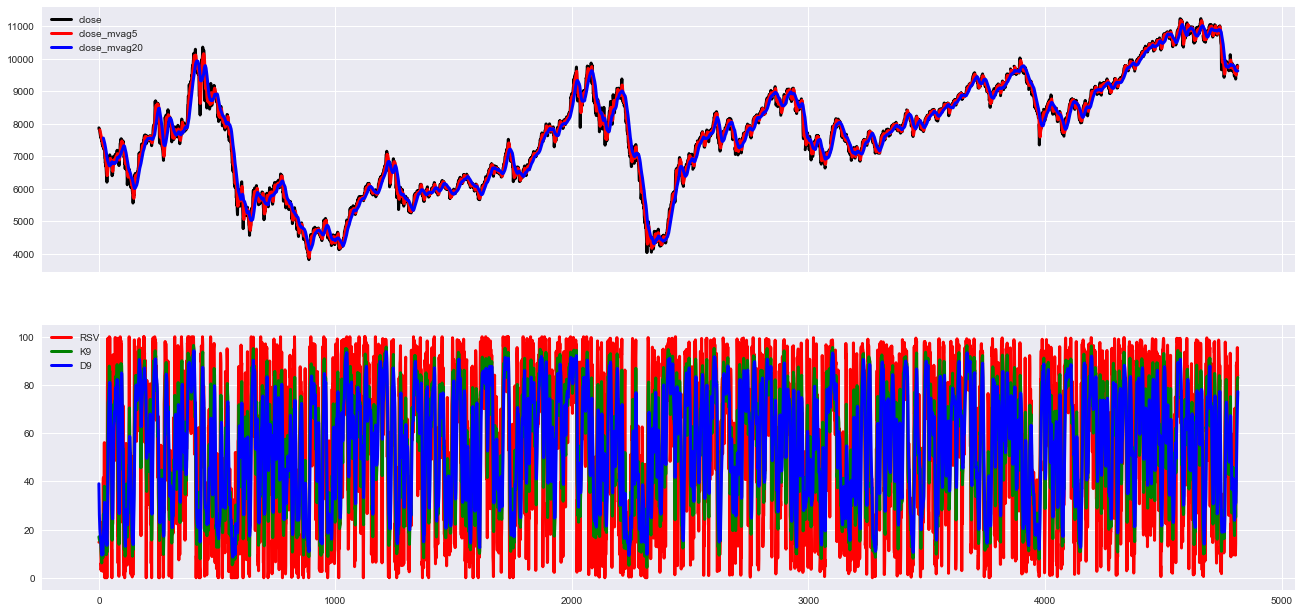

In [35]:

style.use('seaborn')
plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((2,1),(0,0))
ax2 = plt.subplot2grid((2,1),(1,0), sharex= ax1)
df[['close','close_mvag5', 'close_mvag20']].plot(ax= ax1, linewidth=3, color=['k','r','b'])

df[['RSV','K9','D9']].plot(ax= ax2, linewidth=3, color=['r','g','b'])
plt.show()


## 學習 預測

In [37]:
from sklearn import preprocessing, cross_validation, neighbors

D:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
df.index=df.loc[:,'date']
df = df.loc[date(2000,1,1):date(2015,1,1)]

labels = []

for i in range(len(df.index)):
    if df['open'][i] < df['settlement'][i]:
        labels.append(1)
    else:
        labels.append(0)

df['labels'] = pd.Series(labels, index= df.index)

X = np.array(df[['y_K9','y_D9','y_close_mvag5','y_close_mvag20']])
X = preprocessing.scale(X)
y = np.array(df['labels'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

clf = neighbors.KNeighborsClassifier()

clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

print ('accuracy', accuracy)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

accuracy 0.45573294629898403


## 回測

4722, 2009-01-05T00:00:00 long, because forecast is: 1, you earn: -52
89600.0
4699, 2009-01-06T00:00:00 long, because forecast is: 1, you earn: 6
90800.0
4758, 2009-01-07T00:00:00 long, because forecast is: 1, you earn: -7
89400.0
4650, 2009-01-08T00:00:00 long, because forecast is: 1, you earn: -197
50000.0
4447, 2009-01-09T00:00:00 long, because forecast is: 1, you earn: -26
44800.0
4362, 2009-01-10T00:00:00 long, because forecast is: 1, you earn: 12
47200.0
4386, 2009-01-12T00:00:00 long, because forecast is: 1, you earn: 38
54800.0
4361, 2009-01-13T00:00:00 short, because forecast is: 0, you earn: -163
22200.0
4490, 2009-01-14T00:00:00 long, because forecast is: 1, you earn: 19
26000.0
4222, 2009-01-15T00:00:00 short, because forecast is: 0, you earn: -18
22400.0
4277, 2009-01-16T00:00:00 short, because forecast is: 0, you earn: -48
12800.0
4330, 2009-01-17T00:00:00 short, because forecast is: 0, you earn: -19
9000.0
4378, 2009-01-19T00:00:00 short, because forecast is: 0, you earn

-40800.0
7723, 2011-08-15T00:00:00 short, because forecast is: 0, you earn: -98
-60400.0
7858, 2011-08-16T00:00:00 short, because forecast is: 0, you earn: 84
-43600.0
7758, 2011-08-17T00:00:00 short, because forecast is: 0, you earn: 4
-42800.0
7298, 2011-08-19T00:00:00 short, because forecast is: 0, you earn: 100
-22800.0
7197, 2011-08-22T00:00:00 short, because forecast is: 0, you earn: -60
-34800.0
7301, 2011-08-23T00:00:00 short, because forecast is: 0, you earn: -207
-76200.0
7530, 2011-08-24T00:00:00 long, because forecast is: 1, you earn: -110
-98200.0
7543, 2011-08-25T00:00:00 short, because forecast is: 0, you earn: 176
-63000.0
7399, 2011-08-26T00:00:00 short, because forecast is: 0, you earn: -48
-72600.0
7470, 2011-08-29T00:00:00 short, because forecast is: 0, you earn: -60
-84600.0
7600, 2011-08-30T00:00:00 short, because forecast is: 0, you earn: -3
-85200.0
7617, 2011-08-31T00:00:00 short, because forecast is: 0, you earn: -91
-103400.0
7750, 2011-09-01T00:00:00 short, 

-355000.0
7700, 2013-08-22T00:00:00 short, because forecast is: 0, you earn: -114
-377800.0
7760, 2013-08-23T00:00:00 short, because forecast is: 0, you earn: -27
-383200.0
7818, 2013-08-26T00:00:00 long, because forecast is: 1, you earn: 5
-382200.0
7802, 2013-08-27T00:00:00 long, because forecast is: 1, you earn: -45
-391200.0
7699, 2013-08-28T00:00:00 long, because forecast is: 1, you earn: 79
-375400.0
7798, 2013-08-29T00:00:00 long, because forecast is: 1, you earn: 96
-356200.0
7898, 2013-08-30T00:00:00 long, because forecast is: 1, you earn: 71
-342000.0
7964, 2013-09-02T00:00:00 long, because forecast is: 1, you earn: 54
-331200.0
8038, 2013-09-03T00:00:00 short, because forecast is: 0, you earn: -16
-334400.0
8028, 2013-09-04T00:00:00 long, because forecast is: 1, you earn: 43
-325800.0
8091, 2013-09-05T00:00:00 short, because forecast is: 0, you earn: -39
-333600.0
8129, 2013-09-06T00:00:00 long, because forecast is: 1, you earn: 10
-331600.0
8150, 2013-09-09T00:00:00 long, b

D:\anaconda\lib\site-packages\ipykernel\__main__.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


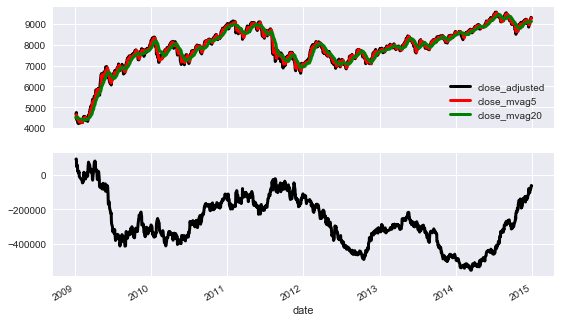

In [39]:
# 做多的賺賠 = 收盤最佳買價 - 開盤價
df['long'] = df['close_best_bid'] - df['open']

# 做空的賺賠 = 開盤價 - 收盤最佳賣價
df['short'] = df['open'] - df['close_best_ask']


def backtest(dataframe, startday, classifier):

    # 先取出要回測的資料 
    df_backtest = dataframe.loc[startday:]

    # 匯入特徵值
    X_backtest = np.array(df_backtest[['y_K9', 'y_D9', 'y_close_mvag5', 'y_close_mvag20']])
    X_backtest = preprocessing.scale(X_backtest)

    # 讓機器預測
    forecast = classifier.predict(X_backtest)

    # 假設初始金錢為 100000
    deposit = 100000
    deposits = []
    right_call = 0
    right_put = 0
    wrong_call = 0
    wrong_put = 0

    # 開始跑從 2009 到今天，每一天的交易情形
    for i in range(len(df_backtest.index)):

        if forecast[i] == 1:
            # 因為是假設買一口大台，一點的賺賠是 200 元
            deposit += (df_backtest['long'][i] * 200)
            print ('%d, %s long, because forecast is: %d, you earn: %d' %(df_backtest['open'][i], df_backtest.index[i].isoformat() , forecast[i], df_backtest['long'][i]))
            if df_backtest['long'][i] > 0:
                right_call +=1
            else:
                wrong_call +=1
        elif forecast[i] == 0:
            deposit += (df_backtest['short'][i] * 200)
            print ('%d, %s short, because forecast is: %d, you earn: %d' %(df_backtest['open'][i], df_backtest.index[i].isoformat() , forecast[i], df_backtest['short'][i]))
            if df_backtest['short'][i] > 0:
                right_put +=1
            else:
                wrong_put +=1
        deposits.append(deposit)
        print (deposit)

    # 這邊基本上只是賺賠結果視覺化
    df_backtest['deposits'] = pd.Series(deposits, index= df_backtest.index)
    right_score = right_put + right_call
    wrong_score = wrong_put + wrong_call 
    call_accuracy = right_call / float(right_call + wrong_call)
    put_accuracy = right_put / float(right_put + wrong_put)
    accuracy = right_score/float(right_score + wrong_score)

    print ('your final deposit is %d' %(deposit))
    print ('right call & put:', right_call, right_put, 'wrong call & put:', wrong_call, wrong_put)
    print ('call_accuracy: %f , put_accuracy: %f , accuracy: %f' %(call_accuracy, put_accuracy, accuracy))


    ax1 = plt.subplot2grid((2,1),(0,0))
    ax2 = plt.subplot2grid((2,1),(1,0), sharex= ax1)
    df_backtest[['close_adjusted', 'close_mvag5', 'close_mvag20']].plot(ax= ax1, linewidth=3, color=['k','r','g','b'])
    df_backtest['deposits'].plot(ax= ax2, linewidth=3, color='k')
    plt.show()

backtest(df,date(2009,1,1),clf)